## Dropout Regularization in Deep Learning Models

Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adpatations on training data. It is very efficient way of performing model averaging with neural networks. The term "dropout" refers to dropping out units (both hidden and visible) in a neural network.

A simple and powerful regularization technqiue for neural networks and deep learning models is dropout. 


<b> How the dropout regularization technqiue works.</b>

`Dropout` is a technique where randomly selected neurons are ignored during training. They are "dropped-out" randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

As a neural netwok learn, neuron weights settls into their context within the network. Weights of neurons are tuned for specific features providing some specialization. Neighboring neurons become to rely on this specialization, which if taken too far can result in a fragile modle too specialized to the training data. This reliant on context for a neuron during training is referred to <b> complex co-adaptions </b>

You can imagine that if neurons are randomly dropped out of the network during training, the other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the netwok becomes less sensitive to the specific weights of neurons. This is in turn results in a network that is capable of better generalization and is less likely to overfit the training data

Dropout is easily implemented by randomly selecting nodes to be dropped-out with a given probability (e.g. 20%) each weight update cycle. This is how Dropout is implemented in Keras. Dropout is only used during the training of a model and is not used when evaluating the skill of the model.

<b> Simple Explanation: </b>

Deep neural nets with a large number of parameters are very powerful machine learning systems. However, overfitting is a serious problem in such networks. Large networks are also slow to use, making it difficult to deal with overfitting by combining the predictions to many different large neural nets at test time. Dropout is a technique for adressing this problem. The key idea is to randomly drop units (along with their connections) from the neural network during training. This prevents units from co-adapting too much. During training, dropout samples from an exponential number of different "thinned" networks. At test time, it is easy to approximate the effect of averaging the predictions of all these thinned networks by simply using a single unthinned network that has smaller weights. This significantly reduces overfitting and gives major imporvements over other regularization methods. We show that dropout improves the performance of neural networks on supervised learning tasks in vision, speech recognition, document classification and computational biology, obtaining state of the art results on many benchmark datasets.

<b> Let's see it in code </b>

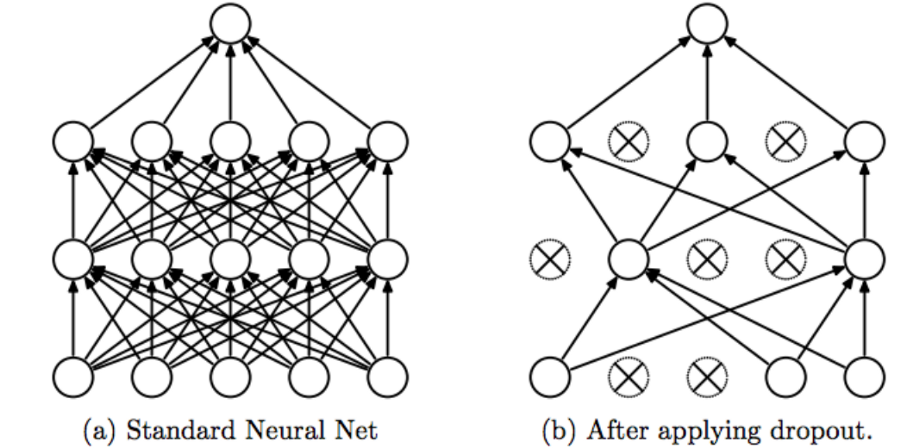

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('sonar_dataset.csv', header = None)

# there is no header in this file, so we will do header = None, 
# so that pandas automatically gives it a heading.

In [6]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
56,0.0152,0.0102,0.0113,0.0263,0.0097,0.0391,0.0857,0.0915,0.0949,0.1504,...,0.0049,0.0041,0.0036,0.0013,0.0046,0.0037,0.0011,0.0034,0.0033,R
103,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,M
115,0.0414,0.0436,0.0447,0.0844,0.0419,0.1215,0.2002,0.1516,0.0818,0.1975,...,0.0045,0.0136,0.0113,0.0053,0.0165,0.0141,0.0077,0.0246,0.0198,M
138,0.0731,0.1249,0.1665,0.1496,0.1443,0.2770,0.2555,0.1712,0.0466,0.1114,...,0.0444,0.0230,0.0290,0.0141,0.0161,0.0177,0.0194,0.0207,0.0057,M
166,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044,M


In [7]:
df.shape

(208, 61)

In [8]:
## check for null values

df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [9]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [10]:
## 60 is our prediction column

df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [11]:
## We see there is categorical data, we have encode it

In [12]:
X = df.drop(60, axis = 1)
y = df[60]


In [13]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [14]:
## encoding with One-hot-encoding

In [15]:
y = pd.get_dummies(y, drop_first = True)


In [16]:
y.sample(5)

,R
61,1
106,0
97,0
122,0
140,0


In [17]:
y.value_counts()

R
0    111
1     97
dtype: int64

In [18]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [20]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
73,0.0139,0.0222,0.0089,0.0108,0.0215,0.0136,0.0659,0.0954,0.0786,0.1015,...,0.0024,0.0062,0.0072,0.0113,0.0012,0.0022,0.0025,0.0059,0.0039,0.0048
166,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0181,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044
138,0.0731,0.1249,0.1665,0.1496,0.1443,0.2770,0.2555,0.1712,0.0466,0.1114,...,0.0361,0.0444,0.0230,0.0290,0.0141,0.0161,0.0177,0.0194,0.0207,0.0057
199,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,...,0.0202,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035
84,0.0378,0.0318,0.0423,0.0350,0.1787,0.1635,0.0887,0.0817,0.1779,0.2053,...,0.0093,0.0046,0.0044,0.0078,0.0102,0.0065,0.0061,0.0062,0.0043,0.0053


### Using Deep Learning Model

1. <b> Model without Droput layer

In [21]:
import tensorflow as tf
from tensorflow import keras


In [22]:
model = keras.Sequential([
    
    keras.layers.Dense(60, input_dim = 60, activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(15, activation ='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
21/21 [==============================] - 2s 5ms/step - loss: 0.6989 - accuracy: 0.5296
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6616 - accuracy: 0.7226
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6461 - accuracy: 0.7381
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6132 - accuracy: 0.7495
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.7636: 0s - loss: 0.5868 - accuracy: 0.76
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5616 - accuracy: 0.7123
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5272 - accuracy: 0.8064
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4815 - accuracy: 0.8087
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4536 - accuracy: 0.8200
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss:

21/21 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 83/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 84/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 85/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 86/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 87/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 88/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 89/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 90/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 91/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 92/100


In [23]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.9558 - accuracy: 0.7143


[0.9558103680610657, 0.7142857313156128]

In [24]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])


## round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[3.2037343e-07 9.9201620e-01 9.2319870e-01 3.1864329e-05 1.0000000e+00
 9.6642691e-01 1.3219089e-02 1.0000000e+00 7.1918694e-06 1.0000000e+00]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [25]:
y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [28]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.81      0.59      0.68        22

    accuracy                           0.71        42
   macro avg       0.73      0.72      0.71        42
weighted avg       0.74      0.71      0.71        42



## Model with Dropout Layer

In [29]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim = 60, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])

modeld.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
modeld.fit(X_train, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
21/21 [==============================] - 1s 4ms/step - loss: 0.6884 - accuracy: 0.5239
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7477 - accuracy: 0.4557
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7043 - accuracy: 0.4679
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7169 - accuracy: 0.4305
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.5694
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.5523
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.5425
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.4801
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5635
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.5840
Epoch 11/

21/21 [==============================] - 0s 4ms/step - loss: 0.2671 - accuracy: 0.9394
Epoch 83/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2961 - accuracy: 0.8817
Epoch 84/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2387 - accuracy: 0.8912
Epoch 85/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2972 - accuracy: 0.8585
Epoch 86/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2193 - accuracy: 0.9303
Epoch 87/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3289 - accuracy: 0.8735
Epoch 88/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2473 - accuracy: 0.9080
Epoch 89/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.8442
Epoch 90/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2841 - accuracy: 0.9097
Epoch 91/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2133 - accuracy: 0.9314
Epoch 92/100


In [30]:
modeld.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.5299 - accuracy: 0.7619


[0.5299204587936401, 0.761904776096344]

In [31]:
## Trainig accuracy is still good but Test Accuracy imporved

In [32]:
y_pred = modeld.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[0.00252994 0.87950945 0.93101066 0.03490837 0.99995756 0.8739904
 0.4459535  0.9998442  0.05923241 0.99998987]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.83      0.68      0.75        22

    accuracy                           0.76        42
   macro avg       0.77      0.77      0.76        42
weighted avg       0.77      0.76      0.76        42

